<a href="https://colab.research.google.com/github/KakashiDin/coursera-capstone/blob/master/airbnb_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tomslee_airbnb_boston_0282_2016-01-16.csv to tomslee_airbnb_boston_0282_2016-01-16.csv


In [ ]:
import io

boston = pd.read_csv(io.BytesIO(uploaded['tomslee_airbnb_boston_0282_2016-01-16.csv']))

In [ ]:
boston.head()

,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified
0,7275108,892781.0,Entire home/apt,NaN,South End,3,5.0,NaN,2.0,380.0,2.0,42.343598,-71.071908,2016-01-16 14:20:07.808024
1,613719,970426.0,Entire home/apt,NaN,Beacon Hill,12,4.5,4.0,1.0,180.0,7.0,42.358973,-71.067036,2016-01-16 14:20:01.317710
2,1724900,7723912.0,Entire home/apt,NaN,Roslindale,18,4.5,4.0,2.0,146.0,5.0,42.282905,-71.132677,2016-01-16 14:19:51.321258
3,3727560,19036819.0,Private room,NaN,Roxbury,76,4.5,2.0,1.0,70.0,2.0,42.329231,-71.079758,2016-01-16 14:19:41.577866
4,8309604,4127253.0,Entire home/apt,NaN,Back Bay,1,5.0,4.0,2.0,290.0,2.0,42.348327,-71.073732,2016-01-16 14:19:26.414634


In [ ]:
df=boston[['room_id','reviews']]

In [ ]:
df=df[[{'reviews':3}]]

TypeError: ignored

In [ ]:
boston.shape

(1275, 14)

In [ ]:
boston.drop(['last_modified','borough'], axis=1,inplace=True)

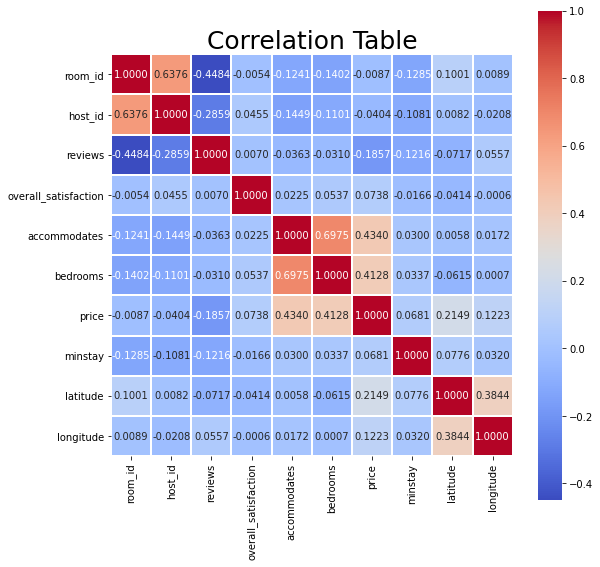

In [ ]:
afig = plt.subplots (figsize = (9,9))
sns.heatmap(boston.corr (), fmt="0.4f",linewidths=1, linecolor='white',square=True, cbar = True, annot = True, cmap="coolwarm")
plt.title('Correlation Table', size = 25)
plt.show ()

### Attributes which have greater correlation than |0.1|

price=('accomodates','bedrooms','lattitude','longitude','reviews');

reviews=('price','minstay') *it means that longer a person stays then he/she will give a better review. Obviously staff will get more familiar to fetch a better remarks*;

accommodates=('bedrooms') **obviously**;

latitude=('longitude') **funny**


In [ ]:
boston.describe()

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude
count,1.275000e+03,1.275000e+03,1275.000000,1038.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,2.236033e+06,7.073113e+06,13.363922,4.652216,2.942745,1.204706,212.904314,2.343529,42.340674,-71.082529
std,1.322650e+06,6.268033e+06,23.361656,0.436354,1.627574,0.656791,160.109034,2.282541,0.024144,0.029930
min,5.453000e+03,4.804000e+03,0.000000,2.000000,1.000000,0.000000,23.000000,1.000000,42.235969,-71.169683
25%,1.090296e+06,1.444340e+06,1.000000,4.500000,2.000000,1.000000,103.000000,1.000000,42.328943,-71.101540
50%,2.357577e+06,5.715872e+06,5.000000,4.500000,2.000000,1.000000,177.000000,2.000000,42.345637,-71.076639
75%,3.453312e+06,1.127671e+07,15.000000,5.000000,4.000000,1.000000,284.000000,3.000000,42.356276,-71.062066
max,4.183090e+06,2.167403e+07,261.000000,5.000000,16.000000,5.000000,2282.000000,26.000000,42.390667,-71.000332


In [ ]:
boston['room_type'].value_counts()

Entire home/apt    763
Private room       484
Shared room         28
Name: room_type, dtype: int64

In [ ]:
boston['neighborhood'].value_counts()

Jamaica Plain              138
South End                  125
Back Bay                   125
Dorchester                 101
Fenway                     100
Beacon Hill                 77
Downtown                    74
Allston                     73
North End                   62
Roxbury                     62
East Boston                 52
South Boston                48
Brighton                    46
West End                    40
Charlestown                 38
Roslindale                  29
Chinatown                   22
Mission Hill                16
South Boston Waterfront     12
Mattapan                     8
West Roxbury                 7
Hyde Park                    7
Bay Village                  5
Leather District             4
Longwood Medical Area        4
Name: neighborhood, dtype: int64

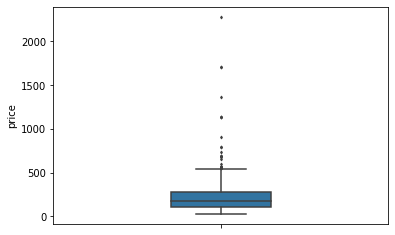

In [ ]:
box=sns.boxplot(y=boston['price'], data=boston, width=0.3, fliersize=2)
box

## Binning

In [ ]:
bins = np.linspace(min(boston["price"]), max(boston["price"]), 4)
group_names = ['Low priced', 'Medium priced', 'High priced']
boston['binned'] = pd.cut(boston['price'], bins, labels=group_names, include_lowest=True )
bin = boston[['binned','price']]
boston['binned'].value_counts()


Low priced       1265
Medium priced       7
High priced         3
Name: binned, dtype: int64

I tried to bin- price(only 10 fell into medium and high priced, rest all fell into low priced), (Same heaviness was seen at low reviewed) in reviews category, and in overall satisfaction all fell into 4.5 to 5 category.

Text(0.5, 1.0, 'bins')

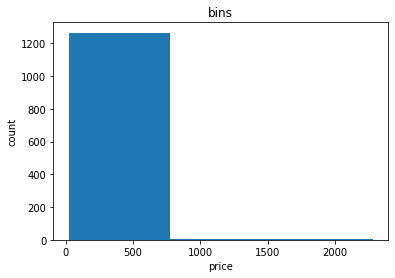

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "price" with bins = 3
plt.pyplot.hist(boston["price"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("bins")

In [ ]:
boston.loc[0]

room_id                          5453
host_id                          8021
room_type                Private room
neighborhood            Jamaica Plain
reviews                            53
overall_satisfaction                5
accommodates                        2
bedrooms                            1
price                             171
minstay                             1
latitude                      42.3221
longitude                    -71.1093
binned                     Low priced
Name: 0, dtype: object

## Dummies

In [ ]:
bos=pd.get_dummies(boston["binned"])
boston = pd.concat([boston,bos ], axis=1)
boston.loc[lambda boston: boston['Low priced'] == 0]


,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,binned,Low priced,Medium priced,High priced
497,1810397,9485021,Entire home/apt,South End,11,5.0,8,3.0,799.0,1,42.346019,-71.067618,Medium priced,0,1,0
574,2022123,10392711,Private room,Allston,0,NaN,1,1.0,1141.0,1,42.350949,-71.136826,Medium priced,0,1,0
678,2537186,3135473,Entire home/apt,Downtown,0,NaN,6,3.0,1711.0,1,42.353629,-71.062283,High priced,0,0,1
719,2669524,13665103,Entire home/apt,Back Bay,0,NaN,6,3.0,1141.0,1,42.351558,-71.083696,Medium priced,0,1,0
820,2993107,1546670,Entire home/apt,Bay Village,0,NaN,4,2.0,1369.0,2,42.349820,-71.067650,Medium priced,0,1,0
854,3111523,6191851,Entire home/apt,Allston,0,NaN,2,1.0,2282.0,1,42.364362,-71.118150,High priced,0,0,1
885,3246559,16422682,Private room,South End,0,NaN,1,1.0,1711.0,1,42.336848,-71.069476,High priced,0,0,1
914,3351728,10502779,Entire home/apt,Beacon Hill,3,5.0,8,5.0,799.0,4,42.355985,-71.070761,Medium priced,0,1,0
1039,3705144,18886593,Entire home/apt,Downtown,0,NaN,4,2.0,1135.0,2,42.358744,-71.051710,Medium priced,0,1,0
1108,3887348,13148757,Entire home/apt,Fenway,0,NaN,6,3.0,913.0,2,42.348204,-71.099108,Medium priced,0,1,0


:'((((((( took so much time to find out these 10 IDs

In [ ]:
l=pd.DataFrame(boston.loc[lambda boston: boston['Low priced'] == 0])

In [ ]:
boston.loc[lambda boston: boston['price'] == 2282]

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,binned,Low priced,Medium priced,High priced
854,3111523,6191851,Entire home/apt,Allston,0,NaN,2,1.0,2282.0,1,42.364362,-71.11815,High priced,0,0,1


In [ ]:
boston.drop([497,574,678,719,820,854,885,914,1039,1108], axis=0,inplace=True)

In [ ]:
bins = np.linspace(min(boston["price"]), max(boston["price"]), 4)
group_names = ['Low priced', 'Medium priced', 'High priced']
boston['binned'] = pd.cut(boston['price'], bins, labels=group_names, include_lowest=True )
bin = boston[['binned','price']]
boston['binned'].value_counts()


Low priced       933
Medium priced    303
High priced       29
Name: binned, dtype: int64

Text(0.5, 1.0, 'bins')

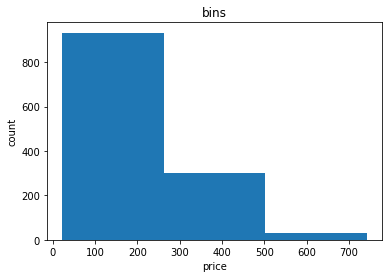

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "price" with bins = 3
plt.pyplot.hist(boston["price"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("bins")

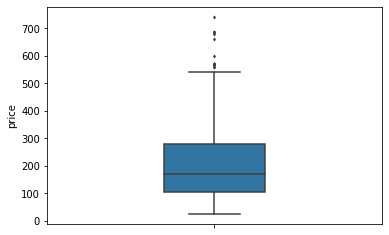

In [ ]:
box=sns.boxplot(y=boston['price'], data=boston, width=0.3, fliersize=2)
box

### What **features** are increasing the **price** of room?


*bedrooms and accomodates*

In [ ]:
g=boston[['bedrooms', 'price']].groupby(['bedrooms'])
g.head(2)

,bedrooms,price
0,1.0,171.0
1,1.0,165.0
6,2.0,257.0
11,2.0,451.0
22,3.0,558.0
23,3.0,428.0
25,0.0,240.0
32,0.0,274.0
62,4.0,662.0
76,5.0,285.0


In [ ]:
g.get_group(2.0)['price']

6       257.0
11      451.0
12      512.0
27      444.0
29      398.0
        ...  
1261    171.0
1265    331.0
1267    485.0
1270    258.0
1273    470.0
Name: price, Length: 224, dtype: float64

In [ ]:
from scipy import stats #ANOVA
f_val, p_val = stats.f_oneway(g.get_group(2.0)['price'], g.get_group(1.0)['price'], g.get_group(2.0)['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 291.20905491357394 , P = 6.418313949440226e-106


In [ ]:
f_val, p_val = stats.f_oneway(g.get_group(3.0)['price'], g.get_group(2.0)['price'], g.get_group(3.0)['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 6.311065125383794 , P = 0.0020763734188158356


In [ ]:
f_val, p_val = stats.f_oneway(g.get_group(4.0)['price'], g.get_group(3.0)['price'], g.get_group(4.0)['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 0.3056639026415864 , P = 0.7378773568062187


In [ ]:
f_val, p_val = stats.f_oneway(g.get_group(5.0)['price'], g.get_group(4.0)['price'], g.get_group(5.0)['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 0.6200695957395619 , P = 0.5556928483477013


### After three-bedrooms, the number of bedrooms doesn't effect price anymore.
lets see the same analysis for accomodates

In [ ]:
g=boston[['accommodates', 'price']].groupby(['accommodates'])
f_val, p_val = stats.f_oneway(g.get_group(2.0)['price'], g.get_group(1.0)['price'], g.get_group(2.0)['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 25.44166609648456 , P = 1.4715056138023704e-11


In [ ]:
f_val, p_val = stats.f_oneway(g.get_group(3.0)['price'], g.get_group(2.0)['price'], g.get_group(3.0)['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 40.36723399946017 , P = 1.7249242946537896e-17


In [ ]:
f_val, p_val = stats.f_oneway(g.get_group(4.0)['price'], g.get_group(3.0)['price'], g.get_group(4.0)['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 6.251541962516335 , P = 0.0020399172031204116


In [ ]:
f_val, p_val = stats.f_oneway(g.get_group(5.0)['price'], g.get_group(1.0)['price'], g.get_group(2.0)['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 154.94970423312964 , P = 4.02260221905252e-57


### Lets try to build a price determiner model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
Z=boston[['accommodates','bedrooms']]
Y=boston[['price']]

In [ ]:
lm.fit(Z, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.intercept_

array([72.78925488])

In [ ]:
lm.coef_

array([[31.35261575, 33.18835887]])

## Clearly using this method is useless here

In [ ]:
boston.drop(columns=['Low priced', 'Medium priced', 'High priced'],inplace=True)


In [ ]:
boston.head(2)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,binned
0,5453,8021,Private room,Jamaica Plain,53,5.0,2,1.0,171.0,1,42.322109,-71.109265,Low priced
1,5506,8229,Private room,Roxbury,30,4.5,2,1.0,165.0,3,42.329809,-71.095595,Low priced


**Newcastle Ct, Boston** is selected because it had the mean latitude and longitude of the data


In [ ]:
import folium
folium_map = folium.Map(location=[42.340674 ,-71.082529], zoom_start=13)
folium.Marker([42.347617,-71.08495], popup='most expensive').add_to(folium_map)

a=pd.DataFrame(boston.loc[lambda boston: boston['binned']=='High priced'])
b=pd.DataFrame(boston.loc[lambda boston: boston['binned']=='Medium priced'])
c=pd.DataFrame(boston.loc[lambda boston: boston['binned']=='Low priced'])

for index, row in a.iterrows():
  folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius=0.01,
                        color= 'yellow').add_to(folium_map)

for index, row in b.iterrows():
  folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius=0.01,
                        color= 'purple').add_to(folium_map)

for index, row in c.iterrows():
  folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius=0.01,
                        color= 'green').add_to(folium_map)

folium_map

### Doing same analysis for **Reviews** removing index 70 to have better binning because it has 261 reviews which is unusaly high. Though we should not remove most reviewed hotel but lets do it just for this analysis

In [ ]:
boston.drop(index=70,inplace=True)

In [ ]:
bins = np.linspace(min(boston["reviews"]), max(boston["reviews"]), 4)        #Binning
group_names = ['Low reviews', 'Medium reviews', 'High reviews']
boston['binned2'] = pd.cut(boston['reviews'], bins, labels=group_names, include_lowest=True )
bin = boston[['binned2','reviews']]

bos=pd.get_dummies(boston["binned2"])                                      #dummies 
boston = pd.concat([boston,bos ], axis=1)



folium_map = folium.Map(location=[42.340674 ,-71.082529], zoom_start=13)
folium.Marker([42.299773, -71.060476], popup='Highest reviewed').add_to(folium_map)

d=pd.DataFrame(boston.loc[lambda boston: boston['binned2']=='High reviews'])  #Building DataFrames
e=pd.DataFrame(boston.loc[lambda boston: boston['binned2']=='Medium reviews'])
f=pd.DataFrame(boston.loc[lambda boston: boston['binned2']=='Low reviews'])

for index, row in d.iterrows():
  folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius=1,
                        color= 'yellow').add_to(folium_map)

for index, row in e.iterrows():
  folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius=0.01,
                        color= 'purple').add_to(folium_map)

for index, row in f.iterrows():
  folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius=0.01,
                        color= 'green').add_to(folium_map)
boston.drop(boston.columns[15:22],axis=1,inplace=True) #to remove dummy columns
folium_map


## Same analysis for **Ratings**

In [ ]:
bins = np.linspace(min(boston["overall_satisfaction"]), max(boston["overall_satisfaction"]), 4)        #Binning
group_names = ['Low ratings', 'Medium ratings', 'High ratings']
boston['binned3'] = pd.cut(boston['overall_satisfaction'], bins, labels=group_names, include_lowest=True )
bin = boston[['binned3','overall_satisfaction']]

bos=pd.get_dummies(boston["binned3"])                                      #dummies 
boston = pd.concat([boston,bos ], axis=1)



folium_map = folium.Map(location=[42.340674 ,-71.082529], zoom_start=13)
folium.Marker([42.313405,-71.058043], popup='lowest rating-2').add_to(folium_map)

g=pd.DataFrame(boston.loc[lambda boston: boston['binned3']=='High ratings'])  #Building DataFrames
h=pd.DataFrame(boston.loc[lambda boston: boston['binned3']=='Medium ratings'])
i=pd.DataFrame(boston.loc[lambda boston: boston['binned3']=='Low ratings'])

for index, row in g.iterrows():
  folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius=1,
                        color= 'green').add_to(folium_map)

for index, row in h.iterrows():
  folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius=0.01,
                        color= 'purple').add_to(folium_map)

for index, row in i.iterrows():
  folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius=0.01,
                        color= 'yellow').add_to(folium_map)
boston.drop(boston.columns[15:21],axis=1,inplace=True) #to remove dummy columns
folium_map


In [ ]:
boston.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,binned,binned2,binned3
0,5453,8021,Private room,Jamaica Plain,53,5.0,2,1.0,171.0,1,42.322109,-71.109265,Low priced,Low reviews,High ratings
1,5506,8229,Private room,Roxbury,30,4.5,2,1.0,165.0,3,42.329809,-71.095595,Low priced,Low reviews,High ratings
2,6695,8229,Entire home/apt,Roxbury,39,5.0,4,1.0,222.0,3,42.329941,-71.093505,Low priced,Low reviews,High ratings
3,6976,16701,Private room,Roslindale,26,5.0,2,1.0,74.0,1,42.292438,-71.135765,Low priced,Low reviews,High ratings
4,8789,26988,Entire home/apt,Downtown,1,5.0,2,1.0,165.0,5,42.359187,-71.062651,Low priced,Low reviews,High ratings


In [ ]:
a=boston['overall_satisfaction'].isnull()
boston.loc[lambda boston: a==True]

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,binned,binned2,binned3
12,9858,25188,Entire home/apt,Back Bay,0,NaN,5,2.0,512.0,2,42.344471,-71.081786,High priced,Low reviews,NaN
15,9903,25188,Entire home/apt,Mission Hill,0,NaN,2,1.0,296.0,3,42.335296,-71.101462,Medium priced,Low reviews,NaN
17,10758,38440,Private room,Allston,0,NaN,1,1.0,131.0,1,42.353449,-71.131797,Low priced,Low reviews,NaN
18,10807,38440,Private room,Allston,0,NaN,2,1.0,91.0,1,42.354123,-71.130486,Low priced,Low reviews,NaN
20,10810,38440,Private room,Allston,0,NaN,2,1.0,97.0,4,42.353359,-71.130344,Low priced,Low reviews,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,4178790,1444340,Entire home/apt,South End,0,NaN,6,2.0,258.0,2,42.337460,-71.074624,Low priced,Low reviews,NaN
1271,4179835,20380894,Private room,West End,0,NaN,2,1.0,205.0,1,42.364492,-71.069191,Low priced,Low reviews,NaN
1272,4180660,15693451,Private room,Roxbury,0,NaN,2,1.0,68.0,1,42.326740,-71.084163,Low priced,Low reviews,NaN
1273,4181163,9419684,Entire home/apt,Fenway,0,NaN,5,2.0,470.0,3,42.344076,-71.100437,Medium priced,Low reviews,NaN


In [ ]:
rr=pd.DataFrame(boston.loc[lambda boston: boston['reviews']!=0])
a=rr['overall_satisfaction'].isnull()
rr.loc[lambda rr: a==True]

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,binned,binned2,binned3
257,839375,1730791,Private room,Allston,1,NaN,1,1.0,57.0,1,42.351286,-71.136204,Low priced,Low reviews,NaN
272,891953,3137257,Entire home/apt,Downtown,2,NaN,3,1.0,285.0,7,42.361357,-71.055673,Medium priced,Low reviews,NaN
580,2049271,10503800,Private room,East Boston,1,NaN,2,1.0,57.0,1,42.369524,-71.031943,Low priced,Low reviews,NaN
621,2262096,11551173,Private room,Beacon Hill,1,NaN,2,1.0,74.0,1,42.357993,-71.072721,Low priced,Low reviews,NaN
780,2875671,6033040,Entire home/apt,Beacon Hill,1,NaN,1,0.0,171.0,1,42.359603,-71.067262,Low priced,Low reviews,NaN
870,3182652,2555135,Entire home/apt,Chinatown,1,NaN,5,2.0,365.0,1,42.350336,-71.062149,Medium priced,Low reviews,NaN
1041,3720829,18969796,Entire home/apt,Downtown,2,NaN,4,1.0,387.0,1,42.351277,-71.063972,Medium priced,Low reviews,NaN
1043,3721156,3173838,Private room,Allston,1,NaN,1,1.0,68.0,1,42.351927,-71.134587,Low priced,Low reviews,NaN
1129,3914729,18202088,Entire home/apt,Downtown,1,NaN,2,1.0,250.0,2,42.351174,-71.063471,Low priced,Low reviews,NaN
1172,3993758,10849062,Entire home/apt,Dorchester,1,NaN,2,1.0,136.0,5,42.315278,-71.056260,Low priced,Low reviews,NaN


In [ ]:
os=pd.DataFrame(rr.loc[lambda rr: a==True])
os.shape

(11, 15)

### So basical there are only 11 reviews with no ratings submitted. 
There are 218 hotels with 0 reviews and ratings